# Analiza

In [5]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter

In [6]:
class LogData:
    def __init__(self, info: dict, data_frame: pd.DataFrame):
        self.info = info
        self.df = data_frame

        # fix totals for restarts inside data
        
    def col(self, col_name):
        return self.df[col_name]

In [7]:
def read_log(filename) -> LogData:
    info = {}
    header = []
    rows = []
    with open(filename) as f:
        # Parse info data which is terminated by an empty line
        for line in f:
            if not line.strip():
                break
            k, _, v = line.partition(':')
            info[k.strip()] = v.strip()
        # Read CSV data
        df = pd.read_csv(f)
        return LogData(info, df)        

In [12]:
f = read_log("logs/2022-05-23-01-13-27_beginner_dense_relu_sigmoid_binarycrosse_adam1_predictions")
#f.df.loc[f.df['session_games']==0]
f.df.head(10)

,iteration,loss,val_loss,total_games,total_victories,session_games,session_mean_clicks,session_mean_victories,session_mean_cells_revealed,session_time
0,0,0.498326,0.480777,68,0,68,3.617647,0.0,22.191176,10.282663
1,1,0.533223,0.532712,141,0,73,3.397260,0.0,18.753425,9.903113
2,2,0.505282,0.572620,201,0,60,4.133333,0.0,19.016667,9.750099
3,3,0.463501,0.509348,260,0,59,4.152542,0.0,26.915254,10.381087
4,4,0.468740,0.481606,314,0,54,4.611111,0.0,24.981481,10.380457
5,5,0.484375,0.457636,373,0,59,4.237288,0.0,25.203390,9.982708
6,6,0.482519,0.494604,421,0,48,5.208333,0.0,27.604167,9.966757
7,7,0.476729,0.517425,467,0,46,5.282609,0.0,24.065217,10.979131
8,8,0.455203,0.483097,526,0,59,4.203390,0.0,26.101695,10.672057


In [122]:
line_colors = ['black', 'pink', 'green']
def plot_files(filenames, series, label_key, percent=False):
    pp = []
    for filename in filenames:
        data = read_log(filename)
        arr = data.col(series)#[:100]
        if percent:
            arr = arr * 100
        label = label_key.format(**data.info)
        if len(arr) > 50:
            window = np.clip((len(arr)//60)*2-1, 11, 51)
            arr = savgol_filter(arr, window, 0)
        pp.append((arr, label))
    i=0
    for arr, label in sorted(pp, key=lambda al: al[1]):
        plt.plot(arr, label=label, color=line_colors[i])
        i+=1
    plt.title(series)
    plt.xlabel("training session")
    if percent:
        plt.ylabel("%")
    plt.legend() #title=label_key)
    plt.savefig(f'graphs/{series}', facecolor='white', dpi=199)
    plt.show()

In [107]:
sorted(os.listdir("logs"))

['2022-05-21-00-09-10_beginner_conv2d_relu_sigmoid_binarycrosse_adam1_predictions',
 '2022-05-21-00-11-33_beginner_conv2d_relu_sigmoid_binarycrosse_adam1_neighbours',
 '2022-05-21-00-14-03_beginner_conv2d_relu_sigmoid_binarycrosse_adam1_board',
 '2022-05-21-11-00-23_intermediate_conv2d_relu_sigmoid_binarycrosse_adam1_predictions',
 '2022-05-21-11-00-38_intermediate_conv2d_relu_sigmoid_binarycrosse_adam1_neighbours',
 '2022-05-21-11-00-59_intermediate_conv2d_relu_sigmoid_binarycrosse_adam1_board',
 '2022-05-22-00-19-57_intermediate_conv2d_relu_sigmoid_binarycrosse_adam1_predictions',
 '2022-05-22-00-20-09_intermediate_conv2d_relu_sigmoid_binarycrosse_adam1_neighbours',
 '2022-05-22-00-20-33_intermediate_conv2d_relu_sigmoid_binarycrosse_adam1_board',
 '2022-05-22-15-34-58_intermediate_conv2d_relu_sigmoid_binarycrosse_adam1_predictions',
 '2022-05-22-15-35-02_intermediate_conv2d_relu_sigmoid_binarycrosse_adam1_neighbours',
 '2022-05-22-15-35-06_intermediate_conv2d_relu_sigmoid_binarycross

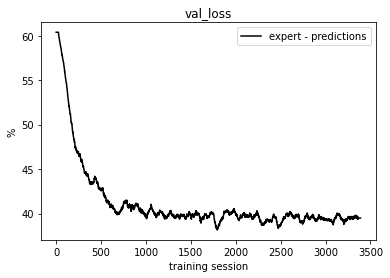

In [147]:
plot_files(
    filenames=[f"logs/{f}" for f in os.listdir("logs") if "2022-05-28" in f],
    series="val_loss",
    label_key="{DIFFICULTY} - {TRUTH ALGORITHM}",
    percent=True)

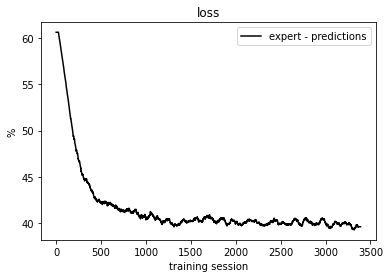

In [148]:
plot_files(
    filenames=[f"logs/{f}" for f in os.listdir("logs") if "2022-05-28" in f],
    series="loss",
    label_key="{DIFFICULTY} - {TRUTH ALGORITHM}",
    percent=True)

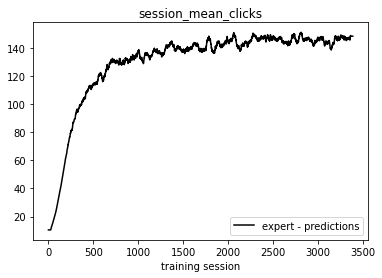

In [149]:
plot_files(
    filenames=[f"logs/{f}" for f in os.listdir("logs") if "2022-05-28" in f],
    series="session_mean_clicks",
    label_key="{DIFFICULTY} - {TRUTH ALGORITHM}",
    percent=False)

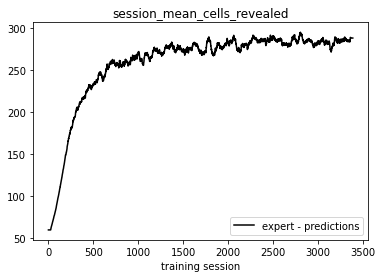

In [151]:
plot_files(
    filenames=[f"logs/{f}" for f in os.listdir("logs") if "2022-05-28" in f],
    series="session_mean_cells_revealed",
    label_key="{DIFFICULTY} - {TRUTH ALGORITHM}",
    percent=False)

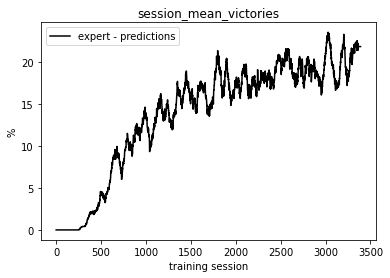

In [152]:
plot_files(
    filenames=[f"logs/{f}" for f in os.listdir("logs") if "2022-05-28" in f],
    series="session_mean_victories",
    label_key="{DIFFICULTY} - {TRUTH ALGORITHM}",
    percent=True)

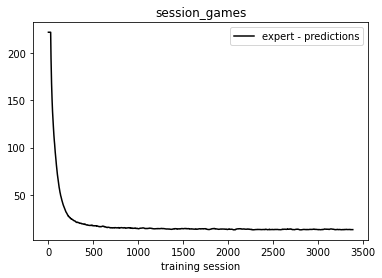

In [153]:
plot_files(
    filenames=[f"logs/{f}" for f in os.listdir("logs") if "2022-05-28" in f],
    series="session_games",
    label_key="{DIFFICULTY} - {TRUTH ALGORITHM}",
    percent=False)